In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('economic_data.csv')
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866


In [9]:
df.corr()

,year,month,interest_rate,unemployment_rate,index_price
year,1.000000e+00,-2.687232e-14,-0.018865,-0.021145,-0.007294
month,-2.687232e-14,1.000000e+00,0.051754,-0.034183,0.061952
interest_rate,-1.886527e-02,5.175405e-02,1.000000,0.014553,0.890899
unemployment_rate,-2.114522e-02,-3.418278e-02,0.014553,1.000000,-0.441184
index_price,-7.294296e-03,6.195158e-02,0.890899,-0.441184,1.000000


In [ ]:
# Removing unnecessary data
df.drop(columns=['year','month'], axis=1, inplace=True)

In [11]:
df.head()

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      1200 non-null   float64
 1   unemployment_rate  1200 non-null   float64
 2   index_price        1200 non-null   float64
dtypes: float64(3)
memory usage: 28.3 KB


In [12]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

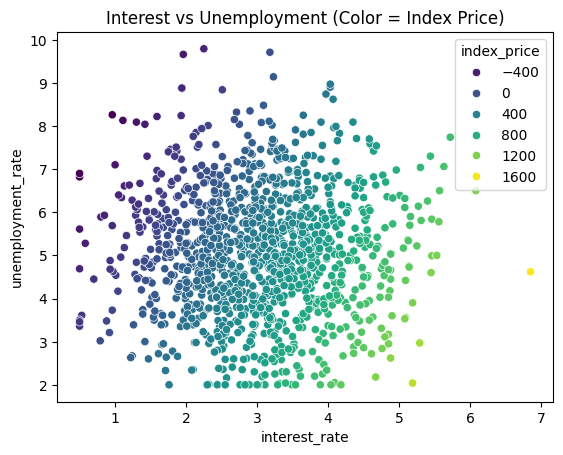

In [16]:
# Visualising the data
sns.scatterplot(
    data=df,
    x='interest_rate',
    y='unemployment_rate',
    hue='index_price',
    palette='viridis'
)
plt.title('Interest vs Unemployment (Color = Index Price)')
plt.show()


In [ ]:
sns.pairplot(df[['interest_rate', 'unemployment_rate', 'index_price']])
plt.show()

In [ ]:
# Independent and dependent feature seperation
X = df[['interest_rate','unemployment_rate']]       # or df.iloc[:,:-1]   except the last all
y = df['index_price']                               # or df.iloc[:,-1]    last only

0       534.714897
1       424.911412
2       582.253910
3       784.797318
4       321.169866
           ...    
1195    767.901200
1196    541.022220
1197    731.564473
1198    435.166468
1199    810.947961
Name: index_price, Length: 1200, dtype: float64

In [36]:
# train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
# regplot for linear regression
sns.regplot(x=df['interest_rate'], y=df['index_price'], line_kws={'color': 'red'})

In [ ]:
sns.regplot(x=df['unemployment_rate'], y=df['index_price'], line_kws={'color': 'red'})

In [27]:
# Scaler transformation 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [66]:
print(f"Coefficient or Slope of the Best-Fit Line : {model.coef_}")   # when unit movement on x-axis, 4.7 unit movement on y-axis
print(f"Intercept of the Best-Fit Line : {model.intercept_}")    

Coefficient or Slope of the Best-Fit Line : [ 297.31383257 -154.7598973 ]
Intercept of the Best-Fit Line : 394.89688787749384


In [47]:
# Cross- Validation
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(model, X_train,y_train, scoring='neg_mean_squared_error', cv=5)
print(f"Fold Score : {validation_score}")
print(f"Average Accuracy : {np.mean(validation_score)}")

Fold Score : [-1.00548188 -0.39602665 -0.85489064 -0.79010767 -0.55172957]
Average Accuracy : -0.7196472812432079


In [51]:
# Predict based on test data
y_pred = model.predict(X_test)
print("Predictions: ", y_pred[0:5])

Predictions:  [159.37250814 372.09391329 110.72917705 552.37364016 615.6108654 ]


In [52]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'RMSE : {rmse:.2f}')

MSE : 0.25
MAE : 0.22
RMSE : 0.50


In [53]:
# R squared metrice
from sklearn.metrics import r2_score
r_sqr_score = r2_score(y_test,y_pred)
print(f'R-Square Score : {r_sqr_score}')

R-Square Score : 0.9999979031131547


In [54]:
# Adjusted R-square
adjusted_r2 = 1 - (1 - r_sqr_score)*(len(y_test)-1)/ (len(y_test) - X_test.shape[1]-1)
print(f"Adjusted R-square: {adjusted_r2}")

Adjusted R-square: 0.9999978913658895


In [ ]:
# Analysing the predicted data and actual data in a dataframe
results = pd.DataFrame({
    'interest_rate' : X_test[:,0],
    'unemployment_rate' : X_test[:,1],
    'Actual_Value' : y_test,
    'Predicted_Value' : y_pred
})
results.head()

,interest_rate,unemployment_rate,Actual_Value,Predicted_Value
1178,-1.030850,-0.458527,159.248741,159.372508
865,-0.405182,-0.631063,371.950571,372.093913
101,-0.436465,0.997678,110.873123,110.729177
439,-0.061065,-1.134868,552.119852,552.373640
58,0.345619,-0.762191,615.362753,615.610865


Assumptions while predicting the data

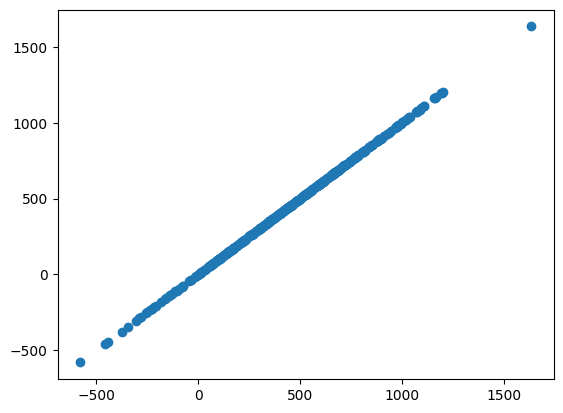

In [ ]:
plt.scatter(x=y_test, y=y_pred) # Shows a linear relationship ie model performing well

1178   -0.123768
865    -0.143342
101     0.143946
439    -0.253788
58     -0.248113
Name: index_price, dtype: float64


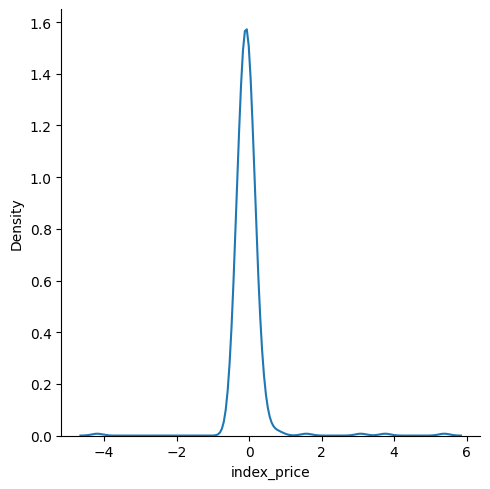

In [ ]:
# Residuals plot - if it is a normal distribution then the model is performing well
residuals = y_test - y_pred
print(residuals[:5])

sns.displot(residuals, kind='kde')

<Axes: ylabel='index_price'>

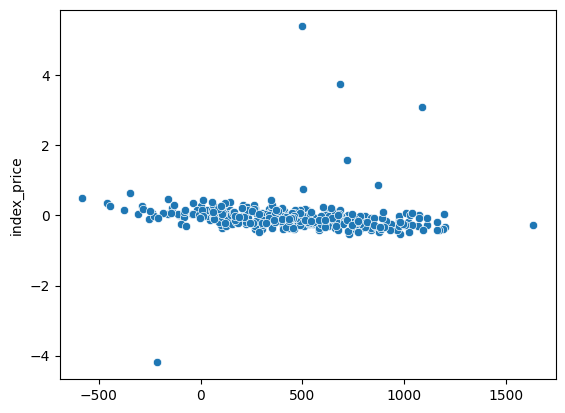

In [ ]:
# Predictions vs residual plot - here the data is uniformly distributed ie, randomly spread across 0, ie model is unbiased and the errors are independent and model fits the data well
sns.scatterplot(x=y_pred, y=residuals)

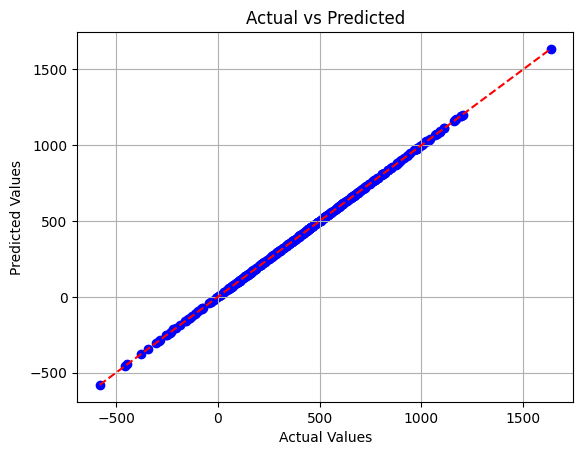

In [67]:
# Visualising the pridicted and actual data via plot
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # perfect line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

In [69]:
# OLS Linear regression
import statsmodels.api as sm

ols_model = sm.OLS(y_train, X_train).fit()
prediction = ols_model.predict(X_test)
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.421
Model:                            OLS   Adj. R-squared (uncentered):              0.420
Method:                 Least Squares   F-statistic:                              304.9
Date:                Tue, 15 Apr 2025   Prob (F-statistic):                   3.21e-100
Time:                        18:35:57   Log-Likelihood:                         -6214.0
No. Observations:                 840   AIC:                                  1.243e+04
Df Residuals:                     838   BIC:                                  1.244e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------